# Mathematical Modeling Lab @ Constructor University 


$\text{A joint-work between Omar Elshinawy & Mohammad Habibi-Bennani, this project was completed in Spring of 2024 for a class in Mathematical }$
$\text{Modeling at Constructor University, under Professor Ivan Ovsyannikov and Mr Dzmitry Rumiantsau. }$

We start by importing the very basic libraries for this project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$\textbf{Problem 3}$ 

The heat equation describes how heat diffuses through a given region over
time. In two dimensions, it is given by

$$\frac{\partial u}{\partial t} = \alpha \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)$$

where $u(t, x, y)$ represents the temperature at point $(x, y)$ and time $t$, and $\alpha$ is the thermal diffusivity constant that determines how quickly heat spreads through the material. We are given the following boundary and initial conditions.

$$u(t, x, y) = \begin{cases}
0, \quad \quad ~~~~~t = 0; ~~~~~x,y \in (0, 100)\\
0, \quad \quad ~~~~x = 0; ~~~~~~~~~y \in (0, 100)\\
0, \quad \quad ~~~~x=100; ~~~~~y \in (0, 100)\\
200, \quad \quad y=0; ~~~~~~~~~x \in [0,100]\\
200, \quad \quad y=100; ~~~~~x \in [0, 100]\\
\end{cases}$$

$\textbf{A Prelude.}$ To start, our system is defined on a $[0,100] \times [0,100]$-sized rectangle. Thus it is clear that

$Lx = Ly = 100$ are the dimensions of the simulation domain $\implies nx = ny = 101$ is the number of grid points along the x- and y-directions.

In [2]:
Lx, Ly = 100, 100
nx, ny = Lx+1, Ly+1

Let us assume further that the thermal diffusivity constant $\alpha$ is equal to $3$.

In [3]:
alpha = 3

$\textbf{a) Parameters}$ We now make the following choices,

- $dx = \frac{Lx}{nx-1}, ~ dy=\frac{Ly}{ny-1}$ is the grid spacing in the x- and y-directions
- $dt = 0.01$ is the step size;
- $nt = 1000$ is the total number of steps.

In [4]:
dx = Lx / (nx - 1)
dy = Ly / (ny - 1)
dt = 0.01  
nt = 1000 

$\textbf{a) Initialization}$ Now that we know the number data points in $x,y,z$ we can define $u(t, x, y)$ properly. It is easy to see that `u = np.zeros((nt, nx, ny))` respects the number of points in each variable.

In [5]:
u = np.zeros((nt, nx, ny))

$\textbf{c) Boundary Conditions}$ As imposed by the problem, we have that

$$\begin{align}
u(t, x, 0) &= 200\\ 
u(t, x, Ly = 100) &= 200\\
u(t, 0, y) &= 0\\
u(t, 100, y) &= 0\\
u(0, x, y) &= 0\\
\end{align}$$

In [6]:
u[:, :, 0] = 200  # y = 0
u[:, :, -1] = 200  # y = 100 = Ly
u[:, 0, :] = 0  # x = 0
u[:, -1, :] = 0  # x = 100 = Lx
u[0, :, :] = 0 # t = 0

This is fairly straightforward, though one must pay great attention to $e.g.$ the $<$ and $\leq$ differences in each condition.

$\textbf{d) Time-stepping Loop}$ Here we update the temperature values using the finite difference method. The update formula for the temperature at each grid point $(i, j)$ is

\begin{equation}
u_{i,j}^{n+1} = u_{i,j}^{n} + \alpha \cdot dt \cdot \left( \frac{u_{i+1,j}^{n} - 2u_{i,j}^{n} + u_{i-1,j}^{n}}{dx^2} + \frac{u_{i,j+1}^{n} - 2u_{i,j}^{n} + u_{i,j-1}^{n}}{dy^2} \right).
\end{equation}

This discretization approximates the second-order derivatives in the heat equation. Boundary conditions are enforced at each time step.

In [7]:
# Time-stepping loop
for n in range(0, nt-1):
    u[n+1, 1:-1, 1:-1] = (u[n, 1:-1, 1:-1] + 
                          alpha * dt * (
                              (u[n, 2:, 1:-1] - 2 * u[n, 1:-1, 1:-1] + u[n, :-2, 1:-1]) / dx**2 +
                              (u[n, 1:-1, 2:] - 2 * u[n, 1:-1, 1:-1] + u[n, 1:-1, :-2]) / dy**2
                          ))
    # Boundary conditions are already enforced by initialization
    u[n+1, :, 0] = 200
    u[n+1, :, -1] = 200
    u[n+1, 0, :] = 0
    u[n+1, -1, :] = 0

$\textbf{e) Plot}$ We are ready to plot the temperature distribution at the final time step using a contour plot. 
- `meshgrid` function creates a grid for plotting; 
- `contourf` generates nicely filled contour plots;   

We even add a nice `hot` color to visually represent the temperature distribution.

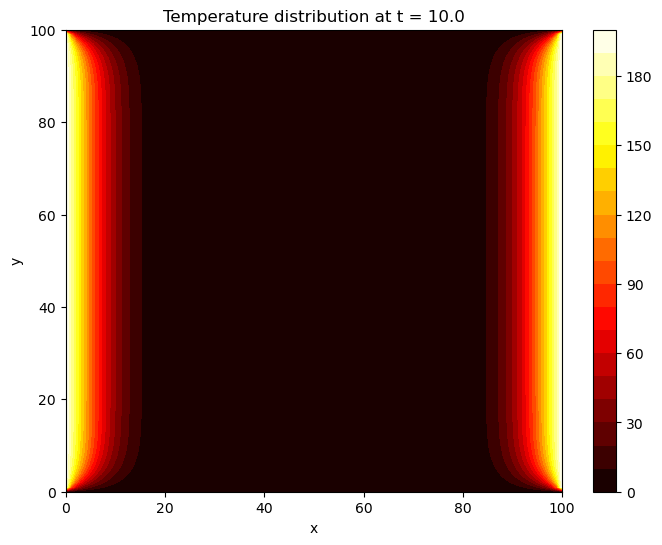

In [8]:
# Plot the final temperature distribution
X, Y = np.meshgrid(np.linspace(0, Lx, nx), np.linspace(0, Ly, ny))
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, u[-1, :, :], 20, cmap='hot')
plt.colorbar()
plt.title('Temperature distribution at t = {}'.format(nt*dt))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

It looks like we just solved a second-order PDEs numerically. You can of course feel free to play with the parameters for yourself and see the effect it bears on the system. The authors highly recommend this, as the results are, to a great extent, visually appealing. $\square$